<img width="600" src='https://github.com/PaoloComensoli/uni/blob/main/BigDataInEconomics/back.jpg?raw=true'>

#Big Data in Economics: Project 1

- Student: *Comensoli Paolo, 883147*

In this notebook we are going to analyze problem #1, regarding the topic of causality, proposed in the course of Big Data in Economics (Data Science Master Degree), University of Milano Bicocca.

The code was implemented using OpenAI's **ChatGPT**. Consequently, the following, can be seen as a **prompt engineering task**. However, not all of the analysis was completely entrusted to the artificial intelligence system, but considerations were made for each step. Therefore, the tool was used to support the analysis.

<br/>

<img width="300" src='https://miro.medium.com/v2/resize:fit:821/1*i8q5s6Y-_i1HO37li9-rtQ.png'>

<br/>

The Innobarometer (2009) placed the focus on innovation spending, the role of innovation in public procurement tenders, the effects of public policies and private initiatives to boost innovation, and other strategic trends.

https://data.europa.eu/data/datasets/s751_267?locale=en

In particular, we are interested in whether there is a relationship between whether or not a company has invested in research and development and whether or not it has introduced innovation, in products, services, marketing strategies, and so on.

## How to read this notebook?

The various steps will follow the proposed exercise outline. Each prompt provided to ChatGPT will be highlighted by the keyword: `Prompt:`. Any errors and corrections made to the provided code will be indicated.

</br>

For example, after checking that ChatGPT had already minimal knowledge of the innobarometer dataset I provided the following prompt:

**Prompt**: You're going to work with a Python notebook. A dataset about innobarometer data was loaded into a dataframe called `df`. Some prompts will be provided and you will have to respond with the code.


## Data Loading

As a first step, we load the provided dataset. We will use a `pandas` dataframe to store the data.

**Prompt:** Load the data from the following uri https://raw.githubusercontent.com/PaoloComensoli/uni/main/BigDataInEconomics/data/datar.txt in a dataframe called `df`. Use `;` as delimiter. At the end display the head the dataframe.


In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/PaoloComensoli/uni/main/BigDataInEconomics/data/datar.txt'

df = pd.read_csv(url, delimiter=';')
df.head()

,phoneid,countid,iw_lang,d1_a,d1_b,d1_c,d1_f,d2,d3,d4,...,av_innexpend,av_innsales,av_innspend,av_innsegm2,av_prodinno,av_pubpol,av_procureinno,av_innspendtrend,av_intl,av_ctyp
0,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1,1,1,1,1,1.0,1,1
1,2,1,2,1,1,2,2,2,1,2,...,1.0,2.0,2,2,1,2,1,1.0,2,1
2,3,1,2,1,1,2,2,3,1,1,...,1.0,NaN,1,2,2,1,2,1.0,2,1
3,4,1,2,1,1,1,1,1,1,2,...,2.0,1.0,1,1,1,1,2,2.0,1,1
4,5,1,2,1,1,1,1,3,1,1,...,1.0,3.0,1,3,1,1,1,1.0,1,1


In [2]:
print(df.shape)

(5234, 120)


The dataset consists of `5234` observations and `120` variables.

## Data Preprocessing

In this section we are going to perform some preprocessing operations and filter the original dataset.

### Investment in Research & Development

First, let us consider our treatment variable `Q1_a`. This variable indicates that the firm has invested in research and development. It can take 4 values:
- 1: Yes
- 2: No
- 3: Not Applicable
- 4: DK/NA

As instructed, for simplicity, we will consider 3 to be a 2, and we can eliminate the missing values. We will also turn the value 2 (and 3) into 0, indicating that it has not invested in research and development, keeping the value 1 to indicate that it has invested.

**Prompt**: Take the column `q1_a` and remove all the rows that has a value of 4.

In [3]:
df = df[df['q1_a'] != 4]

**Prompt:** Take the column `q1_a` and convert both the values 3 and 2 in 0. Use the `.loc` function.

In [4]:
df.loc[df['q1_a'].isin([3, 2]), 'q1_a'] = 0

### Innovation Intensity Index

At this point we can build up our index. To construct it we will consider the sum of the variable values from `Q6_a` to `Q6_e`. Again the 3 will be considered equal to the 2 and converted to 0.

**Prompt:** Iterate from column `q6_a` to `q6_e`, and for each column delete all the rows that has a value of 4 and convert both the values 3 and 2 into 0. Use the `.loc` function.

In [5]:
columns = ['q6_a', 'q6_b', 'q6_c', 'q6_d', 'q6_e']

for column in columns:
    df = df.loc[df[column] != 4]
    df.loc[df[column].isin([3, 2]), column] = 0

**Prompt:** Add a new column called `intensity_score` that is the sum of the values of the columns ranging from  'q6_a' to 'q6_e'

In [6]:
df['intensity_score'] = df.loc[:, 'q6_a':'q6_e'].sum(axis=1)

### Main Features

Since we are going to use a matching approach we need to optimally select `controls`. As indicated among the variables that should definitely be taken into consideration are the size of the company and its industry.

In [7]:
my_columns = ['q1_a', 'intensity_score']

Looking at the report, question `D2` answers the question: "*How many employees does your company have [in your country]*?". This varible range from the value of 1 (20-49 employees) to 4 (500+). However, in this dataset there is already a variable called `size`.

**Prompt:** If in the questionarie we have a variable (D2) indicating the size of the company expressed as the number of employee only in its original country, can a variable called size indicate the real size of the firm globally?

**Answer:** Yes, a variable called "size" can indicate the real size of the firm globally, even if the original questionnaire has a variable (D2) indicating the size of the company expressed only in its original country.

If this were the case, we could then expect the variable `D2` to always be less than or equal to the variable `size`.

**Prompt:** Check the number of times the variable `d2` is greater then the variable `size`

In [8]:
count = sum(df['d2'] > df['size'])
print("Number of times 'd2' is greater than 'size':", count)

Number of times 'd2' is greater than 'size': 1115


This does not seem to be the case, and so they could measure two different quantities. As a result, we can keep both variables.

In [9]:
my_columns += ['d2', 'size']

Regarding the industry several variables could come in handy. The `nacecode` column contains the statistical classification of economic activities in the European Community. However, it contains 509 values and may be difficult to handle.

Alternatively, we find the variable `nace2dgt`, which contains only the first two digits and thus a higher-level classification. In this case we have 54 different classes.

To keep things even simpler, however, we could consider the `activity10` variable, which reduces the classification to far fewer elements. As a check we can see if a class of `nace2dgt` belongs to one and only one class of `activity10`.

**Prompt:** For each value of the `activity10` column get all the unique values of the `nace2dgt`.



In [10]:
unique_nace_values = df.groupby('activity10')['nace2dgt'].unique()

In [11]:
print(unique_nace_values)

activity10
1.0                    [1, 2, 5, 23, 24, 32]
2.0                               [3, 4, 44]
3.0                 [6, 7, 8, 9, 11, 28, 36]
4.0             [10, 13, 14, 15, 29, 46, 20]
5.0                     [12, 16, 17, 19, 20]
6.0                         [12, 18, 30, 37]
7.0     [21, 22, 31, 35, 45, 48, 49, 53, 54]
8.0                     [25, 33, 38, 39, 41]
9.0                             [34, 26, 40]
10.0                            [27, 43, 47]
11.0                        [42, 51, 50, 52]
Name: nace2dgt, dtype: object


As it is possible to see a value of `nace2dgt` belongs to only one class of `activity10`. There are 5 missing values that we can remove and then we can create a dummy variable for each class.

**Prompt:** Consider the column called activity10. You will create a dummy variable for each value, with the prexif 'Activity'. Then for each row of the dataframe you should assign the value of 1 to the Activity{index} column corresponding to the value of activity10. For example if the value of activity10 is 3 the column Activity3 will have the value 1 and all the others 0.

In [12]:
df = df.dropna(subset=['activity10'])

In [13]:
df['activity10'] = df['activity10'].astype(int) # This first line of code is missing in ChatGPT but it was necessary
                                                # otherwise it will create the index as a decimal

dummy_variables = pd.get_dummies(df['activity10'], prefix='Activity', prefix_sep='') # prefix_sep='' as a personal preference to not have _
df = pd.concat([df, dummy_variables], axis=1)

<ipython-input-13-392bd1d305f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity10'] = df['activity10'].astype(int) # This first line of code is missing in ChatGPT but it was necessary


In [14]:
my_columns += list(dummy_variables.columns)

Other variables might come in helpful. For example, since each nation might have its own policies, the geographical distinction might make sense.

Here the variable `countid`, which indicates the id of the country to which the company belongs, comes in handy. As in the previous case we create a dummy variable for each country.

**Prompt:** Consider the column called `countid`. You will create a dummy variable for each value, with the prexif 'Country'. Then for each row of the dataframe you should assign the value of 1 to the Country{index} column corresponding to the value of `countid`. For example if the value of countid is 3 the column Country3 will have the value 1 and all the others 0.

In [15]:
dummy_variables = pd.get_dummies(df['countid'], prefix='Country', prefix_sep='')
for column in dummy_variables.columns:
    df[column] = np.where(df['countid'] == int(column.split('Country')[1]), 1, 0)

In [16]:
my_columns += list(dummy_variables.columns)

The age at which the company was established may also help to better match treated and control. Question D3 comes in handy in this case: "*When was your company established?*"
In this case we update that there are only two values in the dataset: 1 (Before 1st January 2001) and 2 (Between 1st January 2001 and 1st January 2006). We have no companies from 2006 onwards. In this case we can make the value into a 0/1 binary, indicating that the company is newly established.

**Prompt:** Take the column `d3` where we have just the values 1 and 2. Convert the 1 in 0 and the 2 in 1.

In [17]:
df['d3'] = df['d3'].replace({1: 0})
df['d3'] = df['d3'].replace({2: 1})

In [18]:
my_columns += ['d3']

Now, to facilitate future analysis, we can extract a dataset with only the columns of interest to us.

In [19]:
df = df[my_columns]

## Analysis
In this section we are going to run regressions and matching between the treated and control groups to test our hypothesis.

### First Regression

To begin our analysis, we can consider a linear regression model using innovation intensity as the outcome variable.

**Prompt:** Perform a linear regression, using the variable `intensity_score` as outcome and all the other variables as covariates. Print the summary of the model and the the level of significance of each regressors.

In [20]:
import statsmodels.api as sm

# Define the outcome variable and covariates
outcome = 'intensity_score'
covariates = df.drop(columns=[outcome])  # Exclude the outcome variable from the covariates

# Add a constant column to the covariates (for the intercept term)
covariates = sm.add_constant(covariates)

# Fit the linear regression model
model = sm.OLS(df[outcome], covariates)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        intensity_score   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     8.971
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           6.99e-53
Time:                        10:06:43   Log-Likelihood:                -5843.3
No. Observations:                4716   AIC:                         1.177e+04
Df Residuals:                    4673   BIC:                         1.205e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7846      0.033     54.333      0.0

To show the results as in R with asterisks we can use the `summary_col` function of the `statsmodels` library.

In [21]:
from statsmodels.iolib.summary2 import summary_col

summary_table = summary_col([results], stars=True, float_format='%.3f',)

print(summary_table)


               intensity_score
------------------------------
const          1.785***       
               (0.033)        
q1_a           -0.100***      
               (0.026)        
d2             -0.021         
               (0.014)        
size           -0.005         
               (0.012)        
Activity1      0.215***       
               (0.028)        
Activity2      -0.021         
               (0.059)        
Activity3      0.508***       
               (0.037)        
Activity4      0.453***       
               (0.037)        
Activity5      0.473***       
               (0.043)        
Activity6      0.571***       
               (0.093)        
Activity7      0.066          
               (0.041)        
Activity8      -0.073         
               (0.045)        
Activity9      -0.062         
               (0.069)        
Activity10     -0.143*        
               (0.077)        
Activity11     -0.203*        
               (0.121)        
Country

Whether or not a company has invested in research and development seems to have a slight negative effect on innovation intensity and be significant. If we ask ChatGPT about this fact:

**Prompt:** What may indicate the fact that a firm has invested in R&D has a negative coefficient in the regression coeffient and is significant?

**Answer:** It suggests that there is a negative relationship between R&D investment and the outcome variable (e.g., intensity_score). Here are a few possible interpretations or implications of a negative and significant coefficient for R&D investment:
- Diminishing returns to R&D: ..
- Competitive environment: ..
- Cost considerations: ..

### Matching

At this point we can calculate the propensity scores and extract the matched records.

**Prompt:** Perform the propensisity score matching in the dataframe. The treatment variable is `q1_a`. In the output I expect to obtain the dataframe with the matched treatment group and the dataframe with the matched control group.

In this case ChatGPT sugget to use the library `causalml`. However, this library does not appear to be installable in the colab environment (!pip install causalml).

If at this point we ask them to use the library `psmpy`:

**Prompt:** Perform the matching using the library `psmpy`.

**Answer:** I apologize for the confusion, but as of my knowledge cutoff in September 2021, there is no widely known Python library called psmpy for propensity score matching. It's possible that the library you mentioned might be specific to a certain project or organization ...

In this part of the code then we will proceed manually. We will use the classified implementation given in their documentation, without further modification. In this case we will go to perform a KNN matching.

In [22]:
# Installing the library

!pip install psmpy -q

In [23]:
from psmpy import PsmPy
from psmpy.plotting import *
from sklearn.utils import shuffle

df = df.reset_index() # We add the index column

psm = PsmPy(df, treatment='q1_a', indx='index')

psm.logistic_ps(balance = True)
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None, drop_unmatched=True)

treated_group = df[df['index'].isin(list(psm.matched_ids['index']))]
control_group = df[df['index'].isin(list(psm.matched_ids['matched_ID']))]

total_group = pd.concat([treated_group, control_group], ignore_index=True)
shuffled_df = shuffle(total_group).reset_index(drop=True)

matched_data = total_group.drop('index', axis=1)

/usr/local/lib/python3.10/dist-packages/psmpy/psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


### Results

Let us now perform the regression again but considering only the matched records.

**Prompt:** Perform a linear regression, using the variable `intensity_score` as outcome and all the other variables as covariates. Print the summary of the model. Use the `matched_data` dataframe.

In [24]:
import statsmodels.api as sm

# Define the outcome variable and covariates
outcome = 'intensity_score'
covariates = matched_data.drop(columns=[outcome])  # Exclude the outcome variable from the covariates

# Add a constant column to the covariates (for the intercept term)
covariates = sm.add_constant(covariates)

# Fit the linear regression model
model = sm.OLS(matched_data[outcome], covariates)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        intensity_score   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     8.801
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.63e-51
Time:                        10:07:53   Log-Likelihood:                -5615.9
No. Observations:                4544   AIC:                         1.132e+04
Df Residuals:                    4501   BIC:                         1.159e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7882      0.034     53.118      0.0

In [25]:
summary_table = summary_col([results], stars=True, float_format='%.3f',)
print(summary_table)


               intensity_score
------------------------------
const          1.788***       
               (0.034)        
q1_a           -0.101***      
               (0.026)        
d2             -0.024*        
               (0.014)        
size           -0.004         
               (0.012)        
Activity1      0.221***       
               (0.028)        
Activity2      -0.076         
               (0.061)        
Activity3      0.514***       
               (0.037)        
Activity4      0.461***       
               (0.038)        
Activity5      0.461***       
               (0.045)        
Activity6      0.610***       
               (0.098)        
Activity7      0.089**        
               (0.042)        
Activity8      -0.083*        
               (0.046)        
Activity9      -0.075         
               (0.075)        
Activity10     -0.126         
               (0.079)        
Activity11     -0.208*        
               (0.122)        
Country

The coefficient of the our variable `q1_a` remained always significant and slightly even more negative. Again, the same considerations made above apply. Looking at this data alone, it would seem that the most innovative companies are those that take advantage of research done by others. This phenomenon is known as spillovers, where, for example, a company investing in research and development may develop new technologies that benefit other firms in the industry, leading to increased productivity and innovation across the sector, but where the original company may not benefit too much.

We cannot know whether this is the case; more data should be collected and analyzed.

### Boxplot

As a final point, we will show through boxplots the mean and dispersion of the treated group, the control group and all firms together.

**Prompt:** Plot 3 boxplot, representing the the intensity_score of the treated group (dataframe treated_group), the control group (control_group), and all the firms (dataframe df). For each boxplot display also the data points with the jitter option. Use the `searborn` library.

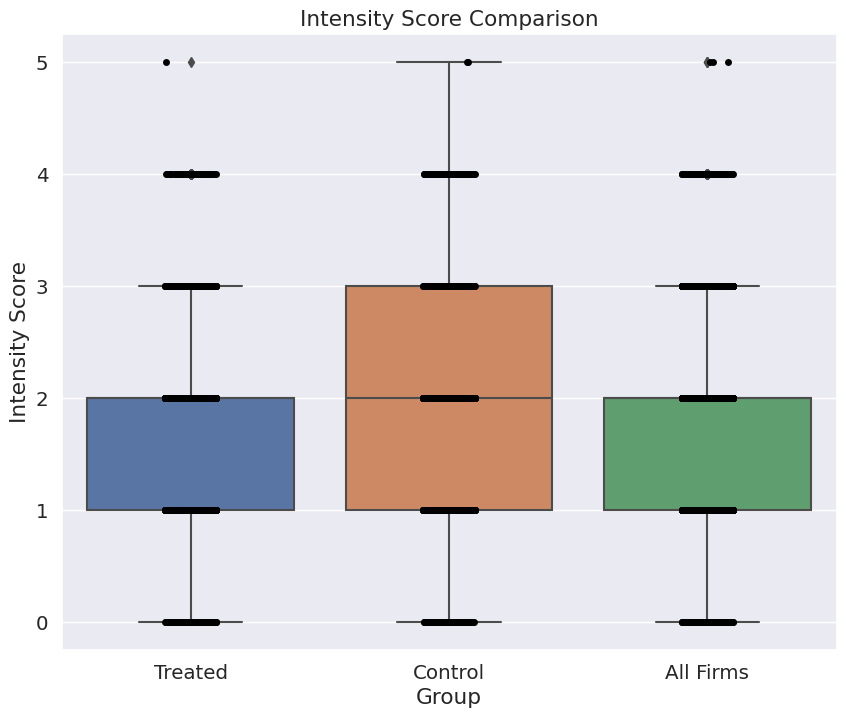

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for the boxplot
data_treated = treated_group['intensity_score']
data_control = control_group['intensity_score']
data_all = df['intensity_score']

# Combine the data into a single dataframe
data = pd.DataFrame({'Group': ['Treated'] * len(data_treated) +
                              ['Control'] * len(data_control) +
                              ['All Firms'] * len(data_all),
                     'intensity_score': list(data_treated) + list(data_control) + list(data_all)})

# Set up the figure and axes
fig, ax = plt.subplots()

# Create the boxplot with jittered data points
sns.boxplot(x='Group', y='intensity_score', data=data, ax=ax)
sns.stripplot(x='Group', y='intensity_score', data=data, jitter=True, color='black', ax=ax)

# Add a title and labels to the plot
plt.title('Intensity Score Comparison')
plt.xlabel('Group')
plt.ylabel('Intensity Score')

# Display the plot
plt.show()

We then with other prompts we fix the various points and arrive at the final version of the graph.

**Prompt:** Reduce the data points size and add some vertical jitter.

**Prompt:** For each boxplot add its data points mean as a dot. Place it hover the jitter data.

Hoever it was not possible to hover the mean points. So to be visibile either enlarge the size of the dots or change the shape.

**Prompt:** For the mean instead of the scatter use an horizontal line.

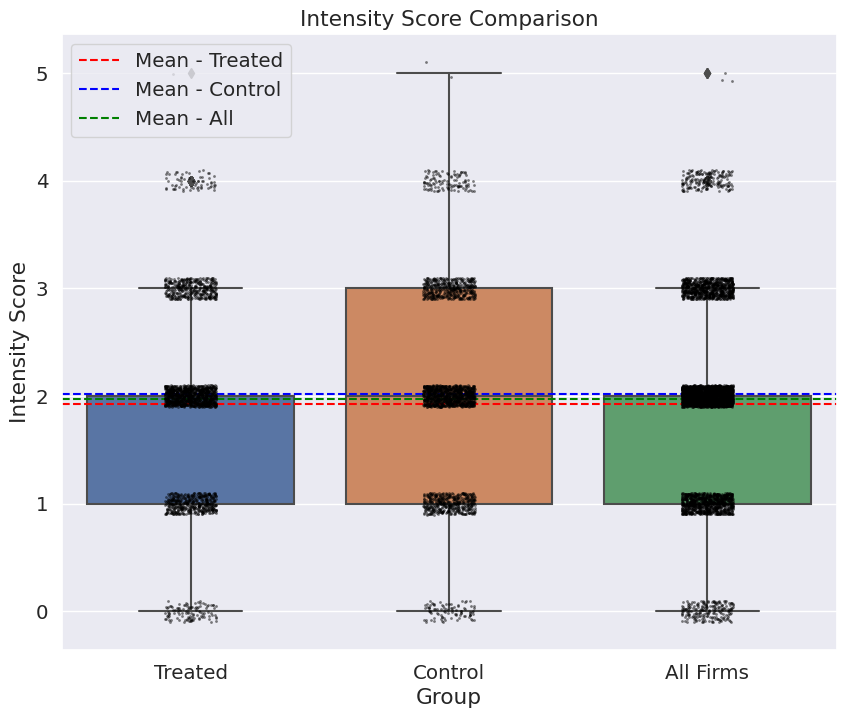

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for the boxplot
data_treated = treated_group['intensity_score']
data_control = control_group['intensity_score']
data_all = df['intensity_score']

# Combine the data into a single dataframe
data = pd.DataFrame({'Group': ['Treated'] * len(data_treated) +
                              ['Control'] * len(data_control) +
                              ['All Firms'] * len(data_all),
                     'intensity_score': list(data_treated) + list(data_control) + list(data_all)})

# Set up the figure and axes
fig, ax = plt.subplots()

# Create the boxplot with jittered data points
sns.boxplot(x='Group', y='intensity_score', data=data, ax=ax)

jitter_amount = 0.1  # Adjust the jitter amount as desired
num_points = len(data)
data['jittered_intensity_score'] = data['intensity_score'] + np.random.uniform(low=-jitter_amount, high=jitter_amount, size=num_points)

# Create the scatterplot with jittered data points
sns.stripplot(x='Group', y='jittered_intensity_score', data=data, jitter=True, color='black', ax=ax, size=2,
              dodge=True, alpha=0.5, edgecolor='gray')

# Calculate the mean for each group
mean_treated = data_treated.mean()
mean_control = data_control.mean()
mean_all = data_all.mean()

# Plot the mean points on top of the jittered points
# plt.scatter([0], [mean_treated], marker='o', color='red', label='Mean - Treated')
# plt.scatter([1], [mean_control], marker='o', color='blue', label='Mean - Control')
# plt.scatter([2], [mean_all], marker='o', color='green', label='Mean - All')

plt.axhline(y=mean_treated, color='red', linestyle='--', label='Mean - Treated')
plt.axhline(y=mean_control, color='blue', linestyle='--', label='Mean - Control')
plt.axhline(y=mean_all, color='green', linestyle='--', label='Mean - All')

# Add a legend
plt.legend()

# Add a title and labels to the plot
plt.title('Intensity Score Comparison')
plt.xlabel('Group')
plt.ylabel('Intensity Score')

# Display the plot
plt.show()

Taking into account the considerations made above, we can see how the control group. Taking into account the considerations made earlier, we can see that in the control group the data are more dispersed. The larger box suggests that the middle 50% of the data points, the interquartile range, is wider, meaning there is a greater spread between the upper and lower quartiles.

## Review of ChatGPT

In this project ChatGPT proved to be very helpful in writing the code, and because of this it significantly sped up the time required.

However, for this specific tasks, it demonstrated some limitations, and it could not have been used in complete autonomy.

When it will be able to use the data directly and have a way of extracting metadata regarding the context, in this case the possible questions and answers of the questionnaire, it will have the ability to be used at a higher level and to replace the user in writing the various steps.